# Continuous variables
-  Quantities that can take any value, not just discrete value
- speed train 45.68.. k/hr

## Probability density function (PDF)
- Continuous analog to the PMF

- Mathematical description of the relative likelihood of observing a value of a continuous variable





## Normal PDF
![](https://i.imgur.com/0X2LD1t.png)

### Example
- area under the PDF give probabilities
- greater thatn 300,000 km/s
![](https://i.imgur.com/JzN8rJc.png)

## Normal CDF
- remember: CDF gives the probability the measured speed of light will be less thatn the value on the x-axis

- there is a 97% chance that a speed of light measurement is less than
- 3% chance that is greater
![](https://i.imgur.com/uzTpAAb.png)



# Let’s practice!

## Interpreting PDFs
Consider the PDF shown to the right (it may take a second to load!). Which of the following is true?

![](https://i.imgur.com/Zt8z7ya.png)


Possible Answers
- ***x is more likely than not less than 10.***
- x is more likely than not greater than 10.
- We cannot tell from the PDF if x is more likely to be greater than or less than 10.
- This is not a valid PDF because it has two peaks.

---
Correct! The probability is given by the area under the PDF, and there is more area to the left of 10 than to the right.

## Interpreting CDFs
At right is the CDF corresponding to the PDF you considered in the last exercise. Using the CDF, what is the probability that x is greater than 10?

![](https://i.imgur.com/j1w7YZx.png)

Possible Answers
- ***0.25***
- 0.75
- 3.75
- 15

---
Correct! The value of the CDF at x = 10 is 0.75, so the probability that x < 10 is 0.75. Thus, the probability that x > 10 is 0.25.

# Introduction to the Normal distribution

## Normal distribution
- Describes a continuous variable whose PDF has a single symmetric peak.


#### mean
-  determines whre the center of the peak is
#### standar deviation 
- measures how wide the peak is, or houw spread pout the data are.



![](https://i.imgur.com/mBNTdnp.png)

- mean and std are the names of the parameters of the Normai distribution NOT the results from the computed data when doing exploratory data analysis

| Parameter | _ |Calculated from data |
| -------- | -------- | -------- |
| mean of a Normal distribution| $\neq$| mean computed from data|
|st. dev. of a Normal distribution|$\neq$|standard deviation computed from data|

## Comparing data to a Normal PDF
![](https://i.imgur.com/qHE7IOD.png)

---
- comparing the histogram to the PDF suffers form binning bias, so its better to compare theECDF of the data to the theoretical CDF of the Normal Distribution.

To compute the theoretical CDF, we can use `np.random.normal()` to draw samples and then we can compute the CDF


## Checking Normality of Michelson data


In [ ]:
ls data

In [2]:
import pandas as pd
df = pd.read_csv('data/michelson_speed_of_light.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
michelson_speed_of_light = df['velocity of light in air (km/s)']

## ECDF function

In [3]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

## Checking Normality of Michelson data


In [4]:
import numpy as np

# get mean & std of data
# to oarametize the Normal distribution we are sampling out of
mean = np.mean(michelson_speed_of_light)
std = np.std(michelson_speed_of_light)

# take samples
samples = np.random.normal(mean, std, size=10000)

# compute ECDF data
x, y = ecdf(michelson_speed_of_light)

# normaly distributed theoreticalsamples
x_theor, y_theor = ecdf(samples)

## Plot Normality of Michelson data ECDF
- theoretical
- empirical 

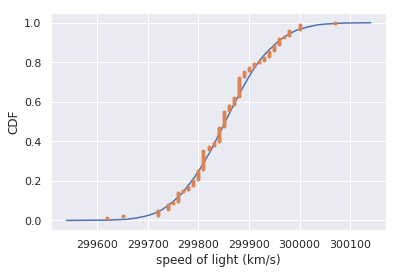

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('speed of light (km/s)')
_ = plt.ylabel('CDF')
plt.show()

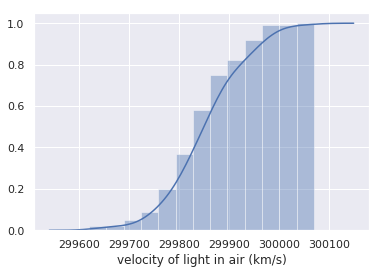

In [7]:
sns.distplot(michelson_speed_of_light,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

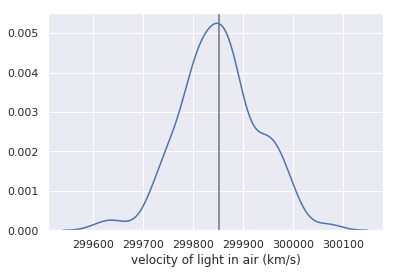

In [8]:
sns.distplot(michelson_speed_of_light,hist=False)
_ = plt.axvline(x=michelson_speed_of_light.mean(), color='0.45', linestyle='-')
plt.show()

# Let’s practice!

## The Normal PDF
In this exercise, you will explore the Normal PDF and also learn a way to plot a PDF of a known distribution using hacker statistics. Specifically, you will plot a Normal PDF for various values of the variance.

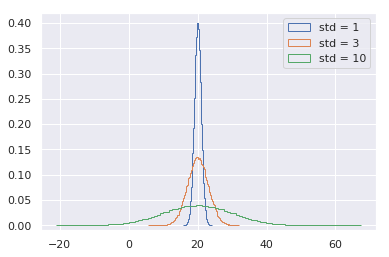

In [9]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10

samples_std1 = np.random.normal(20,1,size=100000)
samples_std3 = np.random.normal(20,3,size=100000)
samples_std10 = np.random.normal(20,10,size=100000)


# Make histograms
_ = plt.hist(samples_std1, density=True, histtype='step', bins=100)
_ = plt.hist(samples_std3, density=True, histtype='step' ,bins=100)
_ = plt.hist(samples_std10, density=True, histtype='step', bins=100)



# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

## The Normal CDF
Now that you have a feel for how the Normal PDF looks, let's consider its CDF. Using the samples you generated in the last exercise (in your namespace as samples_std1, samples_std3, and samples_std10), generate and plot the CDFs.

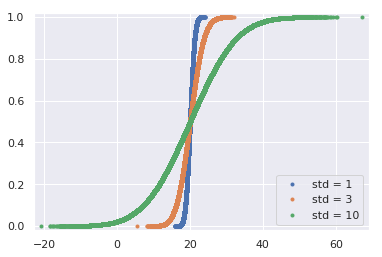

In [10]:
# Generate CDFs

x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)


# Plot CDFs
_ = plt.plot(x_std1, y_std1, marker='.', linestyle='none')

_ = plt.plot(x_std3, y_std3, marker='.', linestyle='none')
_ = plt.plot(x_std10, y_std10, marker='.', linestyle='none')


# Make 2% margin
plt.margins(0.02)

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

In [ ]:
df = pd.read_csv('data/belmont.csv')
df.info()

In [ ]:
df.head()

In [ ]:
df.Time = pd.to_datetime(df.Time).dt.time

In [ ]:
df.head()

## create new column for total seconds

In [ ]:
df['time_in_seconds'] = df.Time.apply(get_sec)

In [ ]:
df.head()

In [ ]:
def get_sec(time_str):
    time_str = str(time_str)
    m, s,ms = time_str.split(':')
    return  int(m) * 60 + int(s)

In [ ]:
df.time_in_seconds.mean()

In [ ]:
df.Time.max()

In [ ]:
df[df.Winner == 'Secretariat']

In [21]:
belmont_secretariat = df[df.Winner == 'Secretariat'].time_in_seconds
belmont_secretariat

Series([], Name: time_in_seconds, dtype: float64)

In [ ]:
sns.distplot(df.time_in_seconds)

In [ ]:
belmont_no_outliers = df.time_in_seconds

In [ ]:
# Compute mean and standard deviation: mu, sigma
mu = belmont_no_outliers.mean()
sigma = belmont_no_outliers.std()

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu,sigma, size = 10000)

# Get the CDF of the samples and of the data
x,y = ecdf(belmont_no_outliers)

x_theor,y_theor = ecdf(samples)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()

In [ ]:
len(samples)

In [ ]:
# Take a million samples out of the Normal distribution: samples

samples = np.random.normal(mu,sigma, size=1000000)
# Compute the fraction that are faster than 144 seconds: prob

prob = np.sum(samples <= belmont_secretariat)/len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)

# The Normal distribution: Properties and warnings

## The Gaussian distribution
![](https://i.imgur.com/Z8x2QAP.png)

## Disalution of Normal distribution

## Length of MA large mouth bass

![](https://i.imgur.com/0Hx0nnV.png)
- 316 fish measured
- looks normally distributed
---
![](https://i.imgur.com/h7V5s95.png)




## Mass of MA large mouth bass
**Not even close **

![](https://i.imgur.com/y2FzUFB.png)


---

## Light tails of the Normal distribution

### normal distribution
![](https://i.imgur.com/LsAcSFy.png)



![](https://i.imgur.com/0WUIyX7.png)

# Let’s practice!

## Are the Belmont Stakes results Normally distributed?
Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. Secretariat ran the fastest Belmont Stakes in history in 1973. While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. With these two outliers removed from the data set, compute the mean and standard deviation of the Belmont winners' times. Sample out of a Normal distribution with this mean and standard deviation using the np.random.normal() function and plot a CDF. Overlay the ECDF from the winning Belmont times. Are these close to Normally distributed?

Note: Justin scraped the data concerning the Belmont Stakes from the Belmont Wikipedia page.

In [26]:
df = pd.read_csv('data/belmont.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 8 columns):
Year       91 non-null int64
Winner     91 non-null object
Jockey     91 non-null object
Trainer    91 non-null object
Owner      91 non-null object
Time       91 non-null object
Track      91 non-null object
miles      91 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 5.8+ KB


## create function to convert time to total seconds

In [27]:
# convert to seconds
def get_sec(time_str):
    time_str = str(time_str)
    m, s, = time_str.split(':')
    return  int(m) * 60 + float(s)

In [28]:
df['time_in_seconds'] = df.Time.apply(get_sec)

In [29]:
belmont_secretariat = df[df.Winner == 'Secretariat'].time_in_seconds
belmont_secretariat

43    144.0
Name: time_in_seconds, dtype: float64

## drop max & min values from time_in_seconds

In [31]:
# remove max & min value
df.drop(df['time_in_seconds'].idxmax(),inplace=True)
df.drop(df['time_in_seconds'].idxmin(),inplace=True)

In [37]:
df[df.Winner == 'Secretariat']

,Year,Winner,Jockey,Trainer,Owner,Time,Track,miles,time_in_seconds


In [17]:
df.time_in_seconds.max()

153.2

In [18]:
df.time_in_seconds.min()

146.0

In [19]:
belmont_no_outliers = df.time_in_seconds

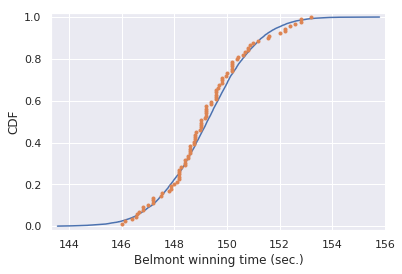

In [20]:
# Compute mean and standard deviation: mu, sigma
mu = belmont_no_outliers.mean()
sigma = belmont_no_outliers.std()

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu,sigma, size = 10000)

# Get the CDF of the samples and of the data
x,y = ecdf(belmont_no_outliers)

x_theor,y_theor = ecdf(samples)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()

## What are the chances of a horse matching or beating Secretariat's record?
Assume that the Belmont winners' times are Normally distributed (with the 1970 and 1973 years removed), what is the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat?

In [39]:
# Take a million samples out of the Normal distribution: samples

samples = np.random.normal(mu,sigma, size=1000000)
# Compute the fraction that are faster than 144 seconds: prob

prob = np.sum(samples <= 144)/len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)

Probability of besting Secretariat: 0.000684


# The Exponential distribution


### The Exponential distribution
- The waiting time between arrivals of a Poisson
process is Exponentially distributed
- It has a single parameter: the mean waiting time

## The Exponential PDF


![](https://i.imgur.com/29pkTSZ.png)


## Possible Poisson process

- Nuclear incidents:
    - Timing of one is independent of all others

## Exponential inter-incident times


```python
In [1]: mean = np.mean(inter_times)
In [2]: samples = np.random.exponential(mean, size=10000)
In [3]: x, y = ecdf(inter_times)
In [4]: x_theor, y_theor = ecdf(samples)
In [5]: _ = plt.plot(x_theor, y_theor)
In [6]: _ = plt.plot(x, y, marker='.', linestyle='none')
In [7]: _ = plt.xlabel('time (days)')
In [8]: _ = plt.ylabel('CDF')
In [9]: plt.show()
```    
    
![](https://i.imgur.com/6grGfu3.png)


# Let’s practice!

## Matching a story and a distribution
How might we expect the time between Major League no-hitters to be distributed? Be careful here: a few exercises ago, we considered the probability distribution for the number of no-hitters in a season. Now, we are looking at the probability distribution of the time between no hitters.

- Normal
- ***Exponential***
- Poisson
- Uniform

---
## Waiting for the next Secretariat
Unfortunately, Justin was not alive when Secretariat ran the Belmont in 1973. Do you think he will get to see a performance like that? To answer this, you are interested in how many years you would expect to wait until you see another performance like Secretariat's. How is the waiting time until the next performance as good or better than Secretariat's distributed? Choose the best answer.

Possible Answers
- Normal, because the distribution of Belmont winning times are Normally distributed.

- Normal, because there is a most-expected waiting time, so there should be a single peak to the distribution.

- Exponential: It is very unlikely for a horse to be faster than Secretariat, so the distribution should decay away to zero for high waiting time.

- **Exponential: A horse as fast as Secretariat is a rare event, which can be modeled as a Poisson process, and the waiting time between arrivals of a Poisson process is Exponentially distributed.**

---

Correct! The Exponential distribution describes the waiting times between rare events, and Secretariat is rare!

## If you have a story, you can simulate it!
Sometimes, the story describing our probability distribution does not have a named distribution to go along with it. In these cases, fear not! You can always simulate it. We'll do that in this and the next exercise.

In earlier exercises, we looked at the rare event of no-hitters in Major League Baseball. Hitting the cycle is another rare baseball event. When a batter hits the cycle, he gets all four kinds of hits, a single, double, triple, and home run, in a single game. Like no-hitters, this can be modeled as a Poisson process, so the time between hits of the cycle are also Exponentially distributed.

How long must we wait to see both a no-hitter and then a batter hit the cycle? The idea is that we have to wait some time for the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. Stated another way, what is the total waiting time for the arrival of two different Poisson processes? The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.

Now, you will write a function to sample out of the distribution described by this story.

In [40]:
def successive_poisson(tau1, tau2, size=1):
    '''a function to sample out of the distribution'''
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)

    return t1 + t2

## Distribution of no-hitters and cycles
Now, you'll use your sampling function to compute the waiting time to observe a no-hitter and hitting of the cycle. The mean waiting time for a no-hitter is 764 games, and the mean waiting time for hitting the cycle is 715 games.

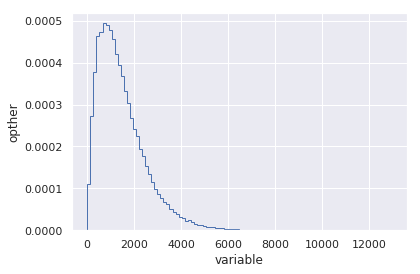

In [41]:
# Draw samples of waiting times: waiting_times
waiting_times = successive_poisson(764,715,100000)

# Make the histogram

_ = plt.hist(waiting_times,bins=100, density=True, histtype='step')

# Label axes

_ = plt.xlabel('variable')
_ = plt.ylabel('opther')

# Show the plot

plt.show()